# Improving a model with Grid Search

In this mini-lab, we'll fit a decision tree model to some sample data. This initial model will overfit heavily. Then we'll use Grid Search to find better parameters for this model, to reduce the overfitting.

First, some imports.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting the random seed. We do this so we always get the same results.
#random.seed(42)

### 1. Reading and plotting the data
Now, two functions. One that will help us read the csv file, and plot the data, and one for plotting the models.

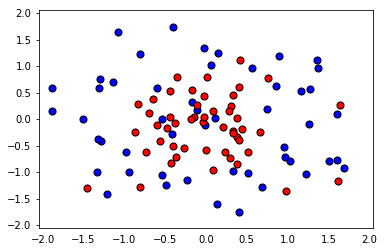

In [2]:
def load_pts(csv_name):
    data = np.asarray(pd.read_csv(csv_name, header=None))
    X = data[:,0:2]
    y = data[:,2]

    plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')
    
    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off')

    return X,y

X, y = load_pts('data.csv')
plt.show()

def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off')

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s.shape = (np.size(r),np.size(r))
    t.shape = (np.size(r),np.size(r))
    z.shape = (np.size(r),np.size(r))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()

### 2. Splitting our data into training and testing sets

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer

#Fixing a random seed
import random
random.seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

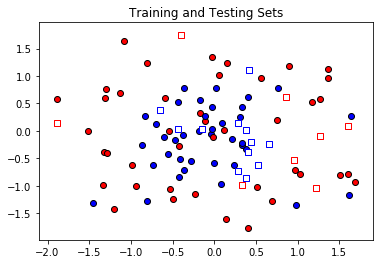

In [4]:
def draw_train_test_datasets(X_train, X_test, y_train, y_test):
    plt.title("Training and Testing Sets")

    for i in range(len(y_train)):
        if y_train[i]==0:
            plt.scatter(X_train[i][0], X_train[i][1], marker = 'o', color='red', edgecolor = 'k')
        else:
            plt.scatter(X_train[i][0], X_train[i][1], marker = 'o', color='blue', edgecolor = 'k')
    for i in range(len(y_test)):
        if y_test[i]==0:
            plt.scatter(X_test[i][0], X_test[i][1], marker = 's', color='white', edgecolor = 'red')
        else:
            plt.scatter(X_test[i][0], X_test[i][1], marker = 's', color='white', edgecolor = 'blue')

draw_train_test_datasets(X_train, X_test, y_train, y_test)

### 3. Fitting a Decision Tree model

Let's fit a decision tree classifier. We won't specify any parameters for now and see which one the computer figures out.

Then we plot the model, and see what happened.

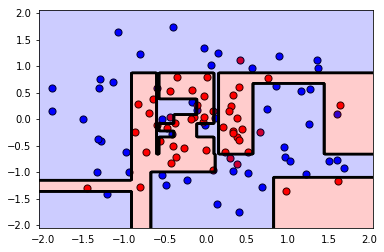

The Training F1 Score is 1.0
The Testing F1 Score is 0.7


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define the model (with default hyperparameters)
clf = DecisionTreeClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Make predictions using the unoptimized and model
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

plot_model(X, y, clf)
print('The Training F1 Score is', f1_score(train_predictions, y_train))
print('The Testing F1 Score is', f1_score(test_predictions, y_test))

Woah! Some heavy overfitting there. Not just from looking at the graph, but also from looking at the difference between the high training score (1.0) and the low testing score (0.7).Let's see if we can find better hyperparameters for this model to do better. We'll use grid search for this.

### 4. Find the best depth with a Model Evaluation Graph

Let's plot the Model Evaluation Graph with different values of depth, in order to find the best depth to train our tree.

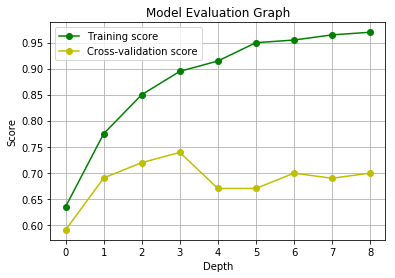

In [16]:
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC

def draw_model_evaluation_graph(X, y):
    param_range_dt = np.arange(1, 10, 1)
    #param_range_svm = np.logspace(-10, -1, 5)

    train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X, y, param_name="max_depth",
                                                 param_range=param_range_dt, scoring="accuracy", n_jobs=1)
    #train_scores, test_scores = validation_curve(SVC(), X, y, param_name="gamma",
    #                                             param_range=param_range_svm, scoring="accuracy", n_jobs=1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Model Evaluation Graph")
    plt.xlabel("Depth")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")

    plt.legend(loc="best")

draw_model_evaluation_graph(X, y)

Great! This Model Evaluation Graph has given us a best depth to work with.

### TODO:
Go ahead, in the box below, fill in best_depth with the depth you consider to be the best one, based on the graph above.

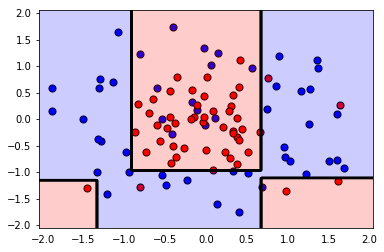

The Training F1 Score is 1.0
The Testing F1 Score is 0.7


In [20]:
best_depth = 3

clf = DecisionTreeClassifier(max_depth=best_depth)
clf.fit(X, y)
plot_model(X, y, clf)
print('The Training F1 Score is', f1_score(train_predictions, y_train))
print('The Testing F1 Score is', f1_score(test_predictions, y_test))

### 5. Use grid search to improve this model.

But we can do even better. Let's train many of the parameters using Grid Search

In here, we'll do the following steps:
1. First define some parameters to perform grid search on. We suggest to play with `max_depth`, `min_samples_leaf`, and `min_samples_split`.
2. Make a scorer for the model using `f1_score`.
3. Perform grid search on the classifier, using the parameters and the scorer.
4. Fit the data to the new classifier.
5. Plot the model and find the f1_score.
6. If the model is not much better, try changing the ranges for the parameters and fit it again.

The training F1 Score is 0.762886597938
The testing F1 Score is 0.758620689655


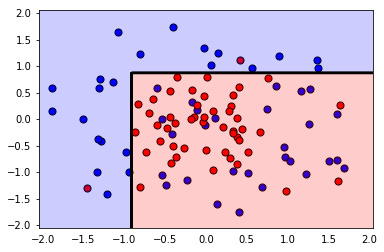

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=6,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [21]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

# Create the parameters list you wish to tune.
parameters = {'max_depth':[2,4,6,8,10],
              'min_samples_leaf':[2,6,10],
              'min_samples_split':[2,6,10],
              'criterion' : ['gini', 'entropy']}

# Make an fbeta_score scoring object.
scorer = make_scorer(f1_score)

# Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, verbose=0)

# Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

# Plot the new model.
plot_model(X, y, best_clf)

# Let's also explore what parameters ended up being used in the new model.
best_clf

### 5. Conclusion
Note that by using GridSearch we improved the F1 Score from 0.7 to 0.8 (and we lost some training score, but this is ok). Also, if you look at the plot, the second model has a much simpler boundary, which implies that it's less likely to overfit.

# Challenges:

1. I got 75.8% as my best testing F1 Score. Can you play with the parameters in Grid Search to obtain more than that?

2. Can you run this whole process with an SVM?